In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import nibabel as nib
import SimpleITK as sitk
from typing import List

# import torch
# import torchvision

this_path = Path().resolve()
pilot_path = Path("/mnt/scratch/7TPD/mpm_run_acu/hmri_maps/sub-003/exp5/Results")

/mrhome/alejandrocu/anaconda3/envs/7tpd/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
def plot_imgs(images: List, labels= None, slice = 100):
    n_imgs = len(images)
    if labels == None:
        labels = [f'img_{i}' for i in range(n_imgs)]
    f,axs = plt.subplots(1, n_imgs, figsize=(4*n_imgs, 8))
    for i,ax in enumerate(axs.flat):
        ax.imshow(sitk.GetArrayFromImage(images[i])[slice, :, :], cmap='gray', origin='lower')
        ax.set_title(labels[i], fontdict={'size':26})
        ax.axis('off')
        plt.tight_layout()
    plt.show()

- PD maps: [50 120] p.u.
- MT saturation maps: [0 2] p.u.
- R2* maps: [0 70] s-1
- R1 maps: [0 1.4] s-1
- B1 maps: [75 125] p.u.
- RF sensitivity maps: [0 2] a.u.

In [12]:
def window_maps(imgs_path: Path, save: bool = True, ranges_dict: dict = None):
    if ranges_dict is None:
        ranges_dict = {'_PD': [50, 120],
                        '_MTsat': [0, 2],
                        '_R2s_WLS1': [0, 70],
                        '_R1': [0, 1.4]
                        }
    for file in imgs_path.iterdir():
        if not file.is_dir():
            if '.nii' in file.name:
                map_type = file.name.split('MPM')[-1].split('.')[0]
                img = sitk.ReadImage(str(file))
                img_w = sitk.IntensityWindowing(img, ranges_dict[map_type][0], ranges_dict[map_type][1],
                                                ranges_dict[map_type][0], ranges_dict[map_type][1])
                if save:
                    file_name = file.name.split('.')[0]
                    sitk.WriteImage(img_w, str(imgs_path / (file_name + '_w.nii')))

In [13]:
window_maps(pilot_path)

### Dev

In [22]:
# PD [50 120]
img = sitk.ReadImage(str(pilot_path/"sub-003_ses-01prisma3t_echo-01_part-magnitude-acq-MToff_MPM_PD.nii"))
img_r = sitk.RescaleIntensity(img, 50, 120)
img_w = sitk.IntensityWindowing(img, 50, 120, 50, 120)

In [21]:
print(sitk.GetArrayFromImage(img_r).min(), sitk.GetArrayFromImage(img_r).max())

50.0 120.0


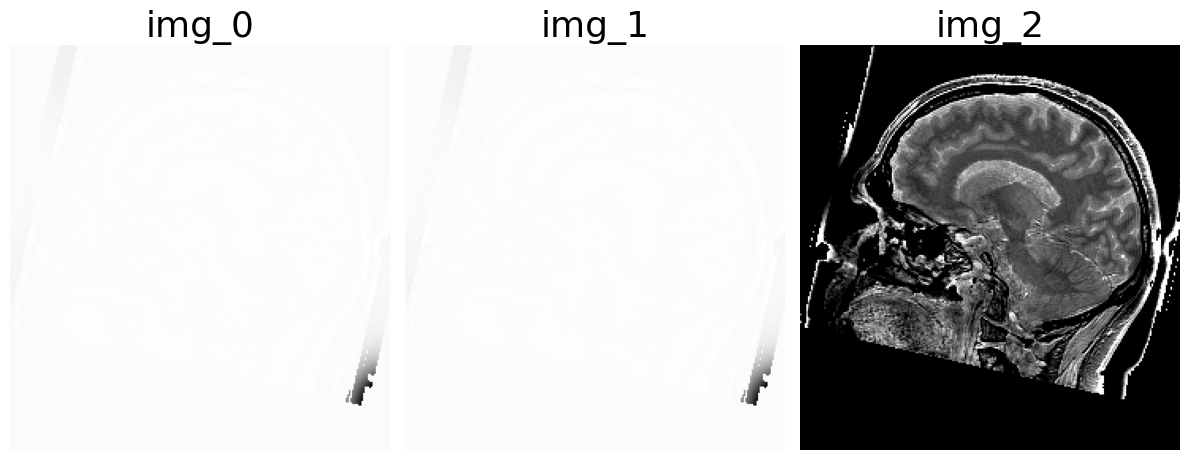

In [23]:
plot_imgs([img, img_r, img_w])